In [ ]:
import pandas as pd

train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

train.dtypes

In [ ]:
# Pré-processamento dos dados

# prrenchi os valores ausentes
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Converter variáveis categóricas em numéricas
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])


In [ ]:
# Selecionar recursos
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_train = train[features]
y_train = train['Survived']
X_test = test[features]



In [ ]:
# Treinei usando RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prever os resultados no conjunto de teste
predictions = model.predict(X_test)


In [ ]:

# Preparar o arquivo de submissão
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv('my_submussion.csv', index=False)


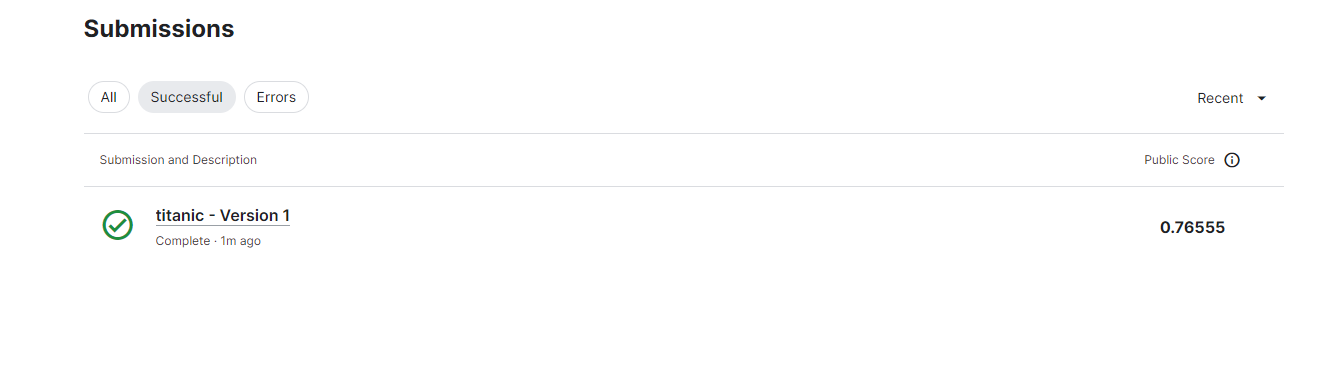

In [14]:
score = 0.76555
(score-0.65)*125

14.44374999999999